# Real-Time Driver Drowsiness Detection Using Deep Learning

# Importing Libraries

In [408]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Displaying Sample Image From Dataset

In [409]:
img_array=cv2.imread("test_datasets/closed_eyes/s0001_00001_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)


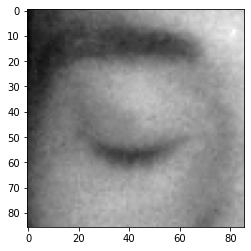

In [410]:
plt.imshow(img_array,cmap="gray")

In [411]:
#Shape of Sample Image From Dataset
img_array.shape

(86, 86)

# Creating Data Directory For Test Dataset With "Closed Eyes & Open Eyes" Labels

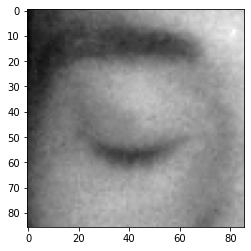

In [412]:
DataDirectory="test_datasets/" ##training dataset
classes=["closed_eyes","open_eyes"]   ##list of classes
for category in classes:
    path=os.path.join(DataDirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

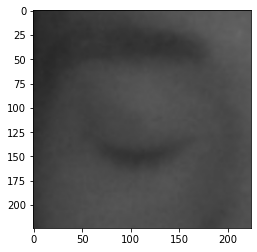

In [413]:
img_size=224
new_array=cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

# Reading All The Images And Converting Into Array For Data and Labels


In [414]:
training_data=[]


def create_training_data():
    for category in classes:
        path=os.path.join(DataDirectory,category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array=cv2.resize(backtorgb,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [415]:
create_training_data()

# Length of Training Data

In [416]:
print(len(training_data))

1981


In [417]:
import random
random.shuffle(training_data)

In [418]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,img_size,img_size,3)

In [419]:
X.shape

(1981, 224, 224, 3)

# Normalize the data

In [420]:
X = X/255.0

In [421]:
Y =np.array(y)

In [422]:
import pickle

pickle_out=open("x.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

# Deep Learning Model for Training-Transfer Learning

In [423]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

In [424]:
model = tf.keras.applications.mobilenet.MobileNet()

In [425]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

# Transfer Learning

In [426]:
base_input = model.layers[0].input  ##input

In [427]:
base_output = model.layers[-4].output

In [428]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_ouput = layers.Activation('sigmoid')(final_output)

In [429]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [430]:
new_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

# Settings for binary classification(open/closed)

In [431]:
new_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [432]:
new_model.fit(X,Y, epochs = 1, validation_split = 0.2) ## training

50/50 [==============================] - 501s 10s/step - loss: 2.0031 - accuracy: 0.8636 - val_loss: 7.7975 - val_accuracy: 0.4887


In [433]:
new_model.save('my_model.h5')

# Checking the network predictions

In [434]:
img_array = cv2.imread("test_datasets/closed_eyes/s0001_00027_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size , img_size))

In [435]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [436]:
X_input.shape

(1, 224, 224, 3)

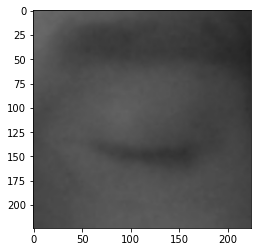

In [437]:
plt.imshow(new_array)

In [438]:
X_input = X_input/225.0

In [439]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 2s 2s/step


In [440]:
prediction

array([[6.9677134]], dtype=float32)

# Lets check for unknown images 

In [496]:
img = cv2.imread('sleepy_women.jpg')

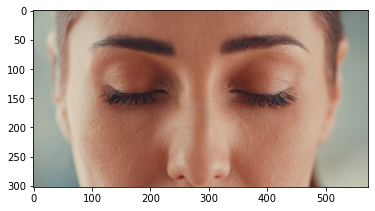

In [497]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [498]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [499]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [500]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [501]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [502]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0),2)

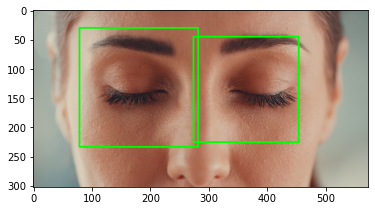

In [503]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Cropping the Eye Image

In [504]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #print(faceCascode.empty())
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
       print("eyes are not detected")
    else:
       for (ex,ey,ew,eh) in eyess:
           eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

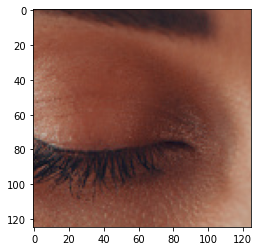

In [505]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [506]:
eyes_roi.shape

(125, 125, 3)

In [507]:
final_image =cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis =0)  ## need fourth dimension
final_image =final_image/255.0

In [508]:
final_image.shape

(1, 224, 224, 3)

In [509]:
new_model.predict(final_image)

1/1 [==============================] - 0s 142ms/step


array([[13.534683]], dtype=float32)

In [533]:
import cv2
path= "haarcascade_frontalface_default.xml"
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#colors
RED=(0,0,255)
GREEN=(0,255,0)

font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# set the rectangle background to white
rectangle_bgr = (255, 255, 255)

# make a black image
img = np.zeros((500, 500))

# set some text
text = "Some text in a box!"
# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]

# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
# make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)


#BEEP
#pip install pygame
from pygame import mixer
mixer.init()
sound= mixer.Sound(r'E:\MITAOE\SEM VII\DL\Project\Beep Beep.mp3')


cap=cv2.VideoCapture(1)
#Check if Webcam is opened Correctly
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Webcam")
    
    
while True:
    ret,img=cap.read()
    eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    eyes=eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        eyess=eye_cascade.detectMultiScale(roi_gray)
        if len(eyess)==0:
            print("eyes are not detected")
        else:
            for(ex,ey,ew,eh) in eyess:
                eyes_roi=roi_color[ey: ey+eh , ex: ex+ew]
                
                
                
    final_image=cv2.resize(eyes_roi,(224,224))
    final_image=np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0

    Predictions=new_model.predict(final_image)
    #print(Predictions)
    if(Predictions>=0):
        color=GREEN
        status="Open Eyes"
        x1,y1,w1,h1 = 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(img, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        #Add text
        cv2.putText(img, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        cv2.putText(img,status,(100, 150), font, 3,(0, 255, 0),2,cv2.LINE_4)
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0))
        
    else:
        color=RED
        status="Closed Eyes"
        sound.play()
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(img, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # Add text
        cv2.putText(img, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(img,status,(100, 150), font, 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(img, (x, y), (x+w, y+h), (0,0,255))
        
        
    #cv2.imshow('Result',img)   
    print(status)
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    
    #Draw a rectangle around faces
    for(x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
        
    font=cv2.FONT_HERSHEY_SIMPLEX
    
    #Use putText() method for inserting text in video
    cv2.putText(frame,
               status,
               (50,50),
               font,3,
               (0,0,255),
                2,
               cv2.LINE_4)
    cv2.imshow("Drowsiness Detection",img)
    
    if(cv2.waitKey(2) & 0xFF == ord('q')):
       break
       

       
cap.release()
cv2.destroyAllWindows()
       


1/1 [==============================] - 0s 129ms/step
Open Eyes
1/1 [==============================] - 0s 141ms/step
Open Eyes
eyes are not detected
1/1 [==============================] - 0s 140ms/step
Open Eyes
1/1 [==============================] - 0s 148ms/step
Open Eyes
1/1 [==============================] - 0s 131ms/step
Open Eyes
eyes are not detected
1/1 [==============================] - 0s 150ms/step
Open Eyes
1/1 [==============================] - 0s 138ms/step
Open Eyes
1/1 [==============================] - 0s 134ms/step
Open Eyes
1/1 [==============================] - 0s 138ms/step
Open Eyes
eyes are not detected
1/1 [==============================] - 0s 133ms/step
Open Eyes
1/1 [==============================] - 0s 131ms/step
Closed Eyes
1/1 [==============================] - 0s 133ms/step
Open Eyes
1/1 [==============================] - 0s 140ms/step
Open Eyes
1/1 [==============================] - 0s 133ms/step
Open Eyes
eyes are not detected
1/1 [=======================